In [28]:
import pandas as pd
import numpy as np
import re

In [29]:
# load data
data = pd.read_csv('bandgap_data_median.csv')
data = data[(data['Value'] >= 0.5) & (data['Value'] <= 5)]
data

,formula,mpids,is_stable,theoretical,band_gap,formation_energy_per_atom,Value,DOI,compound_type
0,Ag2CO3,mp-560717,False,False,0.7490,-1.063132,2.300,10.1016/j.cej.2019.123192,Double anions
1,Ag2Mo2O7,mp-27966,True,False,1.9011,-1.507471,2.685,10.1039/c5ta02337h,Double anions
2,Ag2MoO4,mp-19318,False,False,1.8731,-1.251053,3.260,10.1016/j.physb.2019.02.036,Double anions
3,Ag2S,mp-556225,False,True,1.0853,-0.118033,1.090,10.1016/j.jece.2017.11.071,Double anions
4,Ag2S2O7,mp-1192057,True,False,2.3016,-1.405367,2.240,10.1039/c3nr06565k,Double anions
...,...,...,...,...,...,...,...,...,...
1346,ZrO2,mp-2858,True,False,3.5322,-3.813618,5.000,10.1016/j.cej.2011.10.085,Double anions
1347,ZrS2,mp-1186,True,False,1.0418,-1.847667,1.700,10.1016/j.rinp.2018.10.028,Double anions
1348,ZrS3,mp-9921,True,False,1.1133,-1.574012,2.070,10.1039/c5cp02813b,Chalcogenides
1349,ZrSiO4,mp-4820,True,False,4.1495,-3.558760,4.000,10.1039/c8pp00315g,Chalcogenides


In [30]:
data
# number of data points in the dataset
print("Number of data points in the dataset:", len(data))
# print total number of data points in Temperature_raw_value column
print("Total number of data points in Temperature_raw_value column:", len(data))
# print the number of data points has nan in Temperature_raw_value column
# print("Number of data points with NaN in Temperature_raw_value column:", data['Temperature_raw_value'].isnull().sum())

Number of data points in the dataset: 1183
Total number of data points in Temperature_raw_value column: 1183


In [31]:
def categorize_compound(formula):
    """
    Categorizes a compound formula into predefined categories.

    Args:
        formula (str): The chemical formula to categorize.

    Returns:
        str: The category of the compound.
    """
    # Define regular expressions for each category, ordered by priority
    categories = {
        # "Double anions": r"(?:(?:O|C(?![a-z])|H(?![a-z])|N(?![a-z])|S(?![a-z])|Se|Te|F(?![a-z])|Cl|Br|I|P(?![a-z])|As|Sb|Si|CO3|SO4|NO3|PO4|CN|SCN|ClO3)\d?){2}",
        "Arsenides": r"As",
        "Antimonides": r"Sb",
        "Silicides": r"Si",
        # "Halides": r"F|Cl|Br|I",
        "Halides": r"F(?![a-z])|Cl(?![a-z])|Br(?![a-z])|I(?![a-z])",
        "Chalcogenides": r"S(?![a-z])|Se(?![a-z])|Te(?![a-z])",
        "Oxides": r"O(?![A-Za-z])",
        "Nitrides": r"N(?![A-Za-z])",
        "Phosphides": r"P(?![A-Za-z])",
        
        "Carbides": r"C(?![A-Za-z])",
        "Hydrides": r"H(?![A-Za-z])",
        "Others": None  # Default category
    }

#     categories = {
#     "Double anions": r"(?:(?:O|C|H|N|S|Se|Te|F|Cl|Br|I|P|As|Sb|Si|CO3|SO4|NO3|PO4|CN|SCN|ClO3)\d?){2}",
#     "Arsenides": r"\bAs\b",
#     "Antimonides": r"\bSb\b",
#     "Silicides": r"\bSi\b",
#     "Halides": r"\bF\b|\bCl\b|\bBr\b|\bI\b",  # Ensures only standalone halogens are matched
#     "Chalcogenides": r"\bS\b|\bSe\b|\bTe\b",
#     "Oxides": r"\bO\b",
#     "Nitrides": r"\bN\b",
#     "Phosphides": r"\bP\b",
#     "Carbides": r"\bC\b",
#     "Hydrides": r"\bH\b",
#     "Others": None  # Default category
# }

    # anion_list = [
    #     "O", "N", "S", "Se", "Te", "F", "Cl", "Br", "I", 
    #     "P", "As", "Sb", "C", "Si", "H", "CO3", "SO4", "NO3", "PO4", "CN", "SCN", "ClO3"
    # ]

    # # Rule for compounds with exactly two distinct anions
    # double_anion_pattern = "|".join(sorted(anion_list, key=len, reverse=True))
    

    # categories = {
    #     "Double anions": double_anion_pattern,
    #     "Arsenides": r"As",
    #     "Antimonides": r"Sb",
    #     "Silicides": r"Si",
    #     "Halides": r"F|Cl|Br|I",
    #     "Chalcogenides": r"S|Se|Te",
    #     "Oxides": r"O(?![A-Za-z])",
    #     "Nitrides": r"N(?![A-Za-z])",
    #     "Phosphides": r"P(?![A-Za-z])",
    #     "Carbides": r"C(?![A-Za-z])",
    #     "Hydrides": r"H(?![A-Za-z])",
    #     "Others": None  # Default category
    # }

    # # Add double anions separately
    # for anion in anion_list:
    #     categories[f"Double anions ({anion})"] = rf"\b{anion}(?!\d)\b"

    

    matched_categories = []

    # # Check for double anions first
    # double_anion_pattern = r"(?:O|C|H)\d"
    # if re.search(double_anion_pattern, formula):
    #     return "Double anions (manual check)"

    # Check each category in priority order
    for category, pattern in categories.items():
        if pattern and re.search(pattern, formula):
            matched_categories.append(category)

    # If multiple categories match, prioritize based on the first match
    if matched_categories:
        return matched_categories[0], len(matched_categories)  # Return the highest-priority match

    # If no category matched, return "Others"
    return "Others", 0

data['compound_type'], data['Category_count'] = zip(*data['formula'].map(categorize_compound))

In [32]:
# def categorize_compound(formula):
#     """
#     Categorizes a compound formula into predefined categories.

#     Args:
#         formula (str): The chemical formula to categorize.

#     Returns:
#         str: The category of the compound.
#     """
#     # Define the list of anions
#     anion_list = [
#         "O", "N", "S", "Se", "Te", "F", "Cl", "Br", "I", 
#         "P", "As", "Sb", "C", "Si", "H", "CO3", "SO4", "NO3", "PO4", "CN", "SCN", "ClO3"
#     ]
    
#     # Create a regex pattern for detecting double anions (distinct anions)
#     sorted_anions = sorted(anion_list, key=len, reverse=True)
#     double_anion_pattern = r"\b(" + "|".join(sorted_anions) + r")\b"
    
#     # Define categories and patterns
#     categories = {
#         "Double anions": None,  # Will be checked separately
#         "Arsenides": r"As",
#         "Antimonides": r"Sb",
#         "Silicides": r"Si",
#         "Halides": r"F|Cl|Br|I",
#         "Chalcogenides": r"S|Se|Te",
#         "Oxides": r"O(?![A-Za-z])",
#         "Nitrides": r"N(?![A-Za-z])",
#         "Phosphides": r"P(?![A-Za-z])",
#         "Carbides": r"C(?![A-Za-z])",
#         "Hydrides": r"H(?![A-Za-z])",
#         "Others": None  # Default category
#     }
    
#     # Check for double anions
#     matches = re.findall(double_anion_pattern, formula)
#     distinct_anions = set(matches)
#     if len(distinct_anions) > 1:
#         return "Double anions"
    
#     # Check each category in priority order
#     matched_categories = []
#     for category, pattern in categories.items():
#         if pattern and re.search(pattern, formula):
#             matched_categories.append(category)

#     # If multiple categories match, prioritize based on the first match
#     if matched_categories:
#         return matched_categories[0]  # Return the highest-priority match

#     # If no category matched, return "Others"
#     return "Others"

# data['compound_type'] = data['formula'].apply(categorize_compound)

In [33]:
# return the total number of rows
print("Total number of rows: ", len(data))
# return the number of unique formulas
print("Number of unique formulas: ", len(data['formula'].unique()))
# get a df for unique formulas and its compound type
unique_formulas = data[['formula', 'compound_type']].drop_duplicates()

Total number of rows:  1183
Number of unique formulas:  1183


In [34]:
# get the number of unique formulas for each compound type
unique_formulas['compound_type'].value_counts()

compound_type
Oxides           395
Chalcogenides    337
Halides          185
Antimonides       85
Silicides         52
Arsenides         45
Nitrides          37
Phosphides        21
Hydrides          15
Carbides           7
Others             4
Name: count, dtype: int64

In [35]:
data['Category_count'].value_counts()
# only keep data with single category
unique_data = data[data['Category_count'] == 1]

In [36]:
data

,formula,mpids,is_stable,theoretical,band_gap,formation_energy_per_atom,Value,DOI,compound_type,Category_count
0,Ag2CO3,mp-560717,False,False,0.7490,-1.063132,2.300,10.1016/j.cej.2019.123192,Oxides,1
1,Ag2Mo2O7,mp-27966,True,False,1.9011,-1.507471,2.685,10.1039/c5ta02337h,Oxides,1
2,Ag2MoO4,mp-19318,False,False,1.8731,-1.251053,3.260,10.1016/j.physb.2019.02.036,Oxides,1
3,Ag2S,mp-556225,False,True,1.0853,-0.118033,1.090,10.1016/j.jece.2017.11.071,Chalcogenides,1
4,Ag2S2O7,mp-1192057,True,False,2.3016,-1.405367,2.240,10.1039/c3nr06565k,Chalcogenides,2
...,...,...,...,...,...,...,...,...,...,...
1346,ZrO2,mp-2858,True,False,3.5322,-3.813618,5.000,10.1016/j.cej.2011.10.085,Oxides,1
1347,ZrS2,mp-1186,True,False,1.0418,-1.847667,1.700,10.1016/j.rinp.2018.10.028,Chalcogenides,1
1348,ZrS3,mp-9921,True,False,1.1133,-1.574012,2.070,10.1039/c5cp02813b,Chalcogenides,1
1349,ZrSiO4,mp-4820,True,False,4.1495,-3.558760,4.000,10.1039/c8pp00315g,Silicides,2


In [37]:
data['Category_count'].value_counts()

Category_count
1    904
2    263
3     12
0      4
Name: count, dtype: int64

In [38]:
unique_data['compound_type'].value_counts()

compound_type
Oxides           387
Chalcogenides    283
Halides          128
Nitrides          34
Phosphides        21
Hydrides          15
Arsenides         12
Antimonides       10
Carbides           7
Silicides          7
Name: count, dtype: int64

In [39]:
# # for multiple experimental band gaps that match same formula, select the median value of the band gaps
# # Convert the Value column from string to numeric list
# data['Value'] = data['Value'].str.strip('[]').astype(str).str.split(',').apply(lambda x: list(map(float, x)))

# # Expand rows with list values into separate rows
# data = data.explode('Value')
# data['Value'] = data['Value'].astype(float)

# # Group by the formula column and calculate the median for the Value column
# result = data.groupby('formula', as_index=False).agg({
#     'mpids': 'first',
#     'is_stable': 'first',
#     'theoretical': 'first',
#     'band_gap': 'first',
#     'formation_energy_per_atom': 'first',
#     'Value': 'median',
#     'DOI': 'first',
#     'compound_type': 'first'
# })

# # Save the result to a new CSV file
# result.to_csv('bandgap_data_median.csv', index=False)
# print("Processed data saved to 'bandgap_data_median.csv'")

In [40]:
# # load json dataset and convert it to a pandas dataframe
# import json
# with open('data/ds2.json') as f:
#     ds2 = json.load(f)
# ds2 = pd.DataFrame(ds2)
# # transpose the dataframe
# ds2 = ds2.T
# ds2
# # return the number of data points that has 'formula' matched with 'formula' in the original dataset
# print("Number of data points that has 'formula' matched with 'formula' in the original dataset: ", len(ds2[ds2['formula'].isin(data['formula'])]))

In [41]:
# ds2[['formula']].value_counts()

In [42]:
# # split data into training and test sets, 90% training and 10% test
# train = result.sample(frac=0.9, random_state=0)
# test = result.drop(train.index)
# # generate JSON files for training and test sets
# train_json = train.set_index('mpids')['Value'].to_dict()
# train_json = {key: {"bg": value} for key, value in train_json.items()}
# test_json = test.set_index('mpids')['Value'].to_dict()
# test_json = {key: {"bg": value} for key, value in test_json.items()}
# # save the JSON files
# with open('../DomainAdaptationCGCNN/data/experiment_bg/train_data.json', 'w') as json_file:
#     json.dump(train_json, json_file, indent=4)
# with open('../DomainAdaptationCGCNN/data/experiment_bg/test_data.json', 'w') as json_file:
#     json.dump(test_json, json_file, indent=4)
# print("Processed data saved to 'train_data.json' and 'test_data.json'")
# # print number of data points in training and test sets
# print("Number of data points in training set:", len(train))
# print("Number of data points in test set:", len(test))

In [43]:
from sklearn.model_selection import train_test_split


# Separate `Carbides` and the rest of the data
carbides_data = data[data['compound_type'] == 'Carbides']
other_data = data[data['compound_type'] != 'Carbides']

# Perform stratified split on the rest of the data
train_data, test_data = train_test_split(
    other_data,
    test_size=0.1,  # 10% test data
    stratify=other_data['compound_type'],  # Balanced split for other types
    random_state=42  # For reproducibility
)

# # Add all `Carbides` to the training set
# train_data = pd.concat([train_data, carbides_data])

# # Save the splits to CSV (optional)
# train_data.to_csv('train_data.csv', index=False)
# test_data.to_csv('test_data.csv', index=False)

# # Print the results to check the split
# print("Train Data Distribution:")
# print(train_data['compound_type'].value_counts())

# print("\nTest Data Distribution:")
# print(test_data['compound_type'].value_counts())

# print("\nNumber of data points in training set:", len(train_data))
# print("Number of data points in test set:", len(test_data))

# train_json = train_data.set_index('mpids')['Value'].to_dict()
# train_json = {key: {"bg": value} for key, value in train_json.items()}
# test_json = test_data.set_index('mpids')['Value'].to_dict()
# test_json = {key: {"bg": value} for key, value in test_json.items()}
# # save the JSON files
# # create path if not exists
# import os
# import json
# os.makedirs('data/filtered_data', exist_ok=True)
# with open('data/filtered_data/train_data.json', 'w') as json_file:
#     json.dump(train_json, json_file, indent=4)
# with open('data/filtered_data/test_data.json', 'w') as json_file:
#     json.dump(test_json, json_file, indent=4)
# print("Processed data saved to 'train_data.json' and 'test_data.json'")
# print number of data points in training and test sets


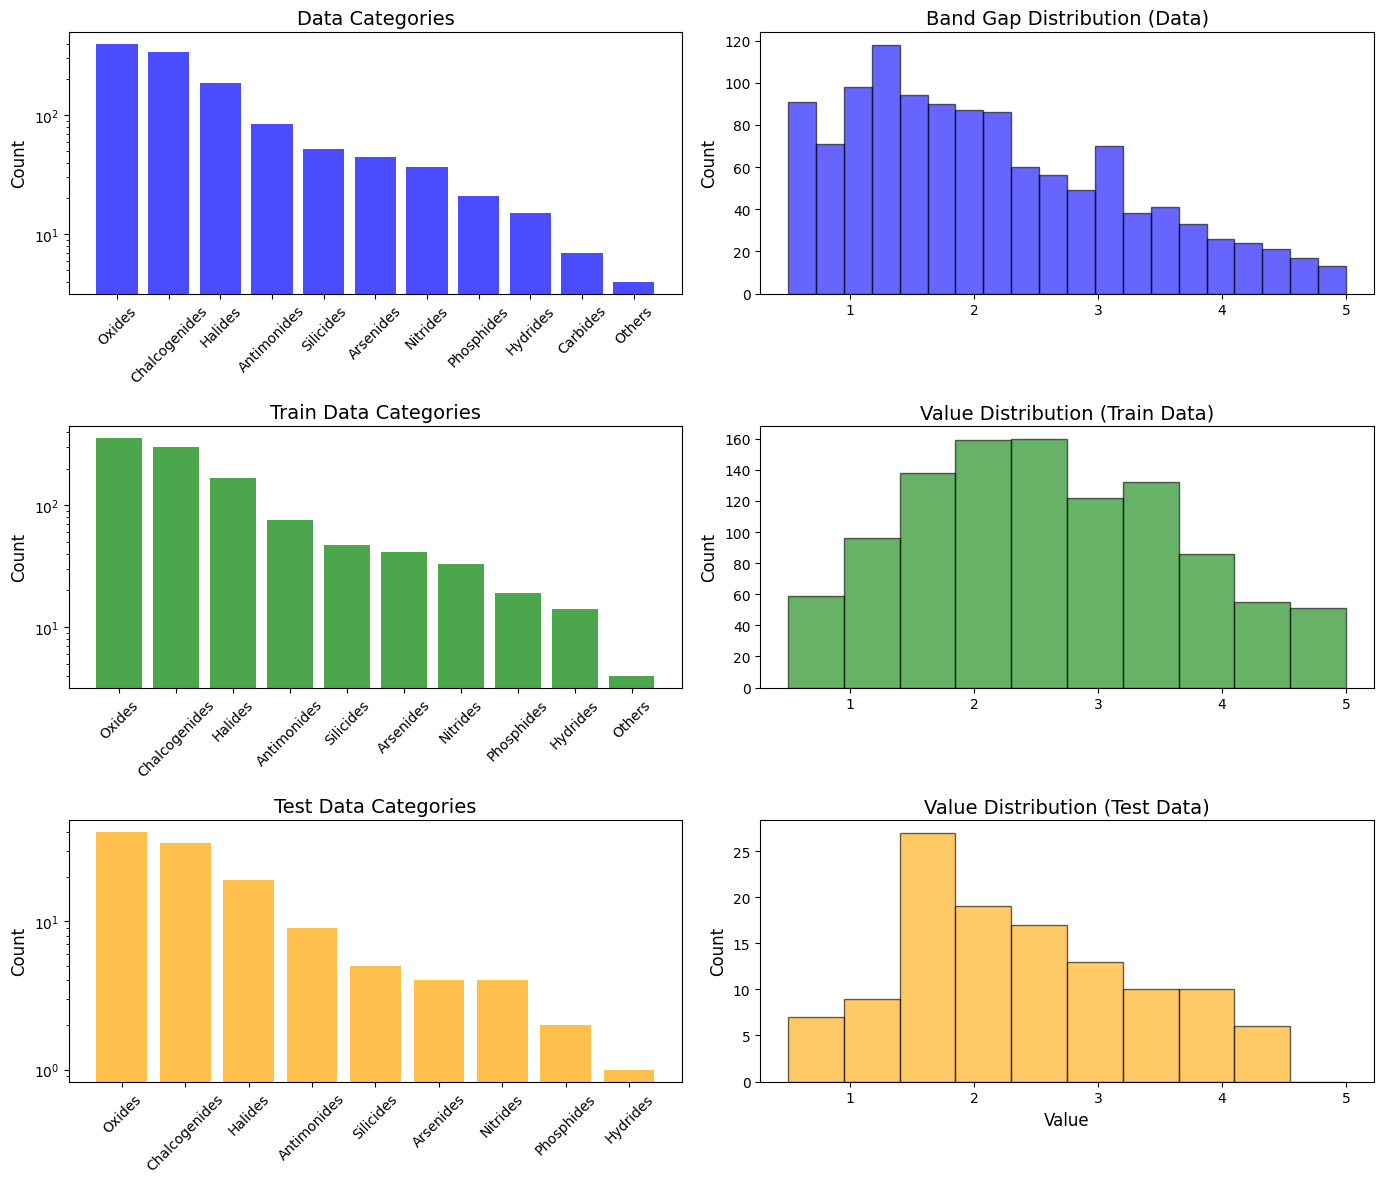

In [44]:
# train test data evaluation
# distribution of data across Value
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

data_comp = pd.read_csv('selected_data.csv')
data_comp['compound_type'], data_comp['Category_count'] = zip(*data_comp['formula'].map(categorize_compound))

# Count occurrences of each category
data_category_counts = data['compound_type'].value_counts()
train_category_counts = train_data['compound_type'].value_counts()
test_category_counts = test_data['compound_type'].value_counts()



# Extract numerical data
data_band_gap = data['band_gap']
train_values = train_data['Value']
test_values = test_data['Value']



# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Plot categories for data
axs[0, 0].bar(data_category_counts.index, data_category_counts.values, color='blue', alpha=0.7)
axs[0, 0].set_yscale('log')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Data Categories')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot categories for train data
axs[1, 0].bar(train_category_counts.index, train_category_counts.values, color='green', alpha=0.7)
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_title('Train Data Categories')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot categories for test data
axs[2, 0].bar(test_category_counts.index, test_category_counts.values, color='orange', alpha=0.7)
axs[2, 0].set_yscale('log')
axs[2, 0].set_ylabel('Count')
axs[2, 0].set_title('Test Data Categories')
axs[2, 0].tick_params(axis='x', rotation=45)

# Plot band_gap distribution for data
axs[0, 1].hist(data_band_gap, bins=20, alpha=0.6, color='blue', edgecolor='black', range=(0.5, 5))
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Band Gap Distribution (Data)')

# Plot Value distribution for train data
axs[1, 1].hist(train_values, bins=10, alpha=0.6, color='green', edgecolor='black', range=(0.5, 5))
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Value Distribution (Train Data)')

# Plot Value distribution for test data
axs[2, 1].hist(test_values, bins=10, alpha=0.6, color='orange', edgecolor='black', range=(0.5, 5))
axs[2, 1].set_ylabel('Count')
axs[2, 1].set_title('Value Distribution (Test Data)')
axs[2, 1].set_xlabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

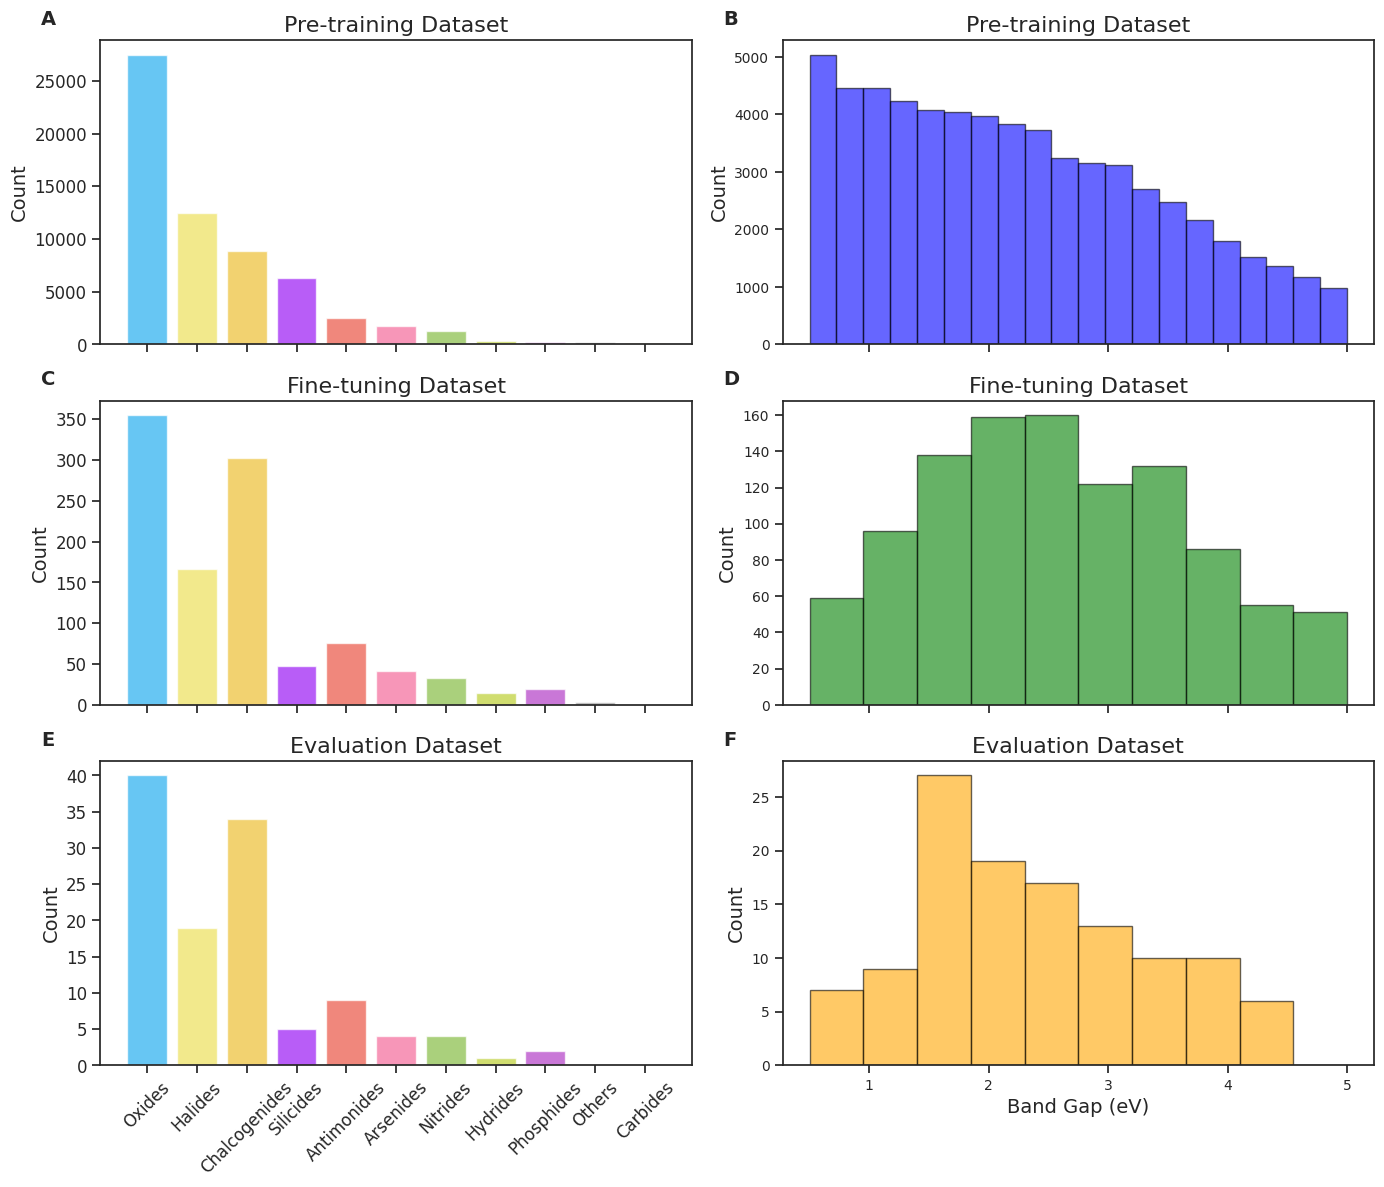

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Increase overall font size globally
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12
})

# Count occurrences of each category
data_category_counts = data_comp['compound_type'].value_counts()
train_category_counts = train_data['compound_type'].value_counts()
test_category_counts = test_data['compound_type'].value_counts()

# Manually set colors for each category based on the provided legend
custom_palette = {
    "Antimonides": "#ea5545",
    "Arsenides": "#f46a9b",
    "Carbides": "#ef9b20",
    "Chalcogenides": "#edbf33",
    "Halides": "#ede15b",
    "Hydrides": "#bdcf32",
    "Nitrides": "#87bc45",
    "Oxides": "#27aeef",
    "Phosphides": "#b33dc6",
    "Silicides": "#9b19f5"
}

# Helper function to map colors to categories
def plot_bar(ax, category_counts, title):
    colors_mapped = [custom_palette.get(cat, "#999999") for cat in category_counts.index]  # Default gray if not found
    ax.bar(category_counts.index, category_counts.values, color=colors_mapped, alpha=0.7)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Extract numerical data
data_band_gap = data_comp['band_gap']
train_values = train_data['Value']
test_values = test_data['Value']

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12), sharex='col')

# Labels for each subplot (A, B, C, D, E, F)
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F']

# Plot categories for data
plot_bar(axs[0, 0], data_category_counts, 'Pre-training Dataset')

# Plot categories for train data
plot_bar(axs[1, 0], train_category_counts, 'Fine-tuning Dataset')

# Plot categories for test data
plot_bar(axs[2, 0], test_category_counts, 'Evaluation Dataset')

# Plot band_gap distribution for data
axs[0, 1].hist(data_band_gap, bins=20, alpha=0.6, color='blue', edgecolor='black', range=(0.5, 5))
axs[0, 1].set_ylabel('Count', fontsize=14)
axs[0, 1].set_title('Pre-training Dataset', fontsize=16)

# Plot Value distribution for train data
axs[1, 1].hist(train_values, bins=10, alpha=0.6, color='green', edgecolor='black', range=(0.5, 5))
axs[1, 1].set_ylabel('Count', fontsize=14)
axs[1, 1].set_title('Fine-tuning Dataset', fontsize=16)

# Plot Value distribution for test data
axs[2, 1].hist(test_values, bins=10, alpha=0.6, color='orange', edgecolor='black', range=(0.5, 5))
axs[2, 1].set_ylabel('Count', fontsize=14)
axs[2, 1].set_title('Evaluation Dataset', fontsize=16)
axs[2, 1].set_xlabel('Band Gap (eV)', fontsize=14)  # X-axis label for bottom-right plot

# Add subplot labels (A, B, C, D, E, F) to each plot
for ax, label in zip(axs.flat, subplot_labels):
    ax.text(-0.1, 1.1, label, transform=ax.transAxes, fontsize=14, fontweight="bold", va="top", ha="left")

# Remove x-axis labels for all other plots
for ax in axs[:-1, 0]:
    ax.set_xlabel('')
for ax in axs[:-1, 1]:
    ax.set_xlabel('')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


/home/haolin/anaconda3/envs/dacgcnn/lib/python3.9/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 8 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/haolin/anaconda3/envs/dacgcnn/lib/python3.9/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 1 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/haolin/anaconda3/envs/dacgcnn/lib/python3.9/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 3 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/haolin/anaconda3/envs/dacgcnn/lib/python3.9/site-packag

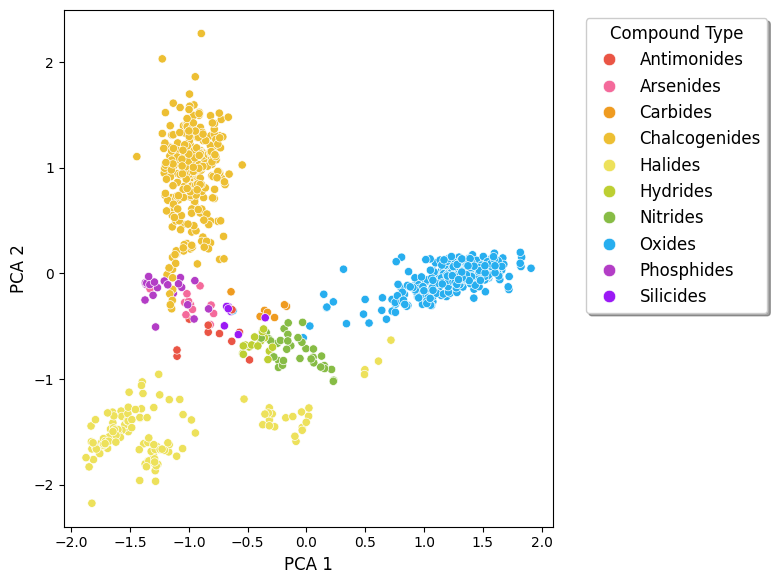

In [46]:
# PCA and t-SNE for the unique_data
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from data_process.cifdata import CIFData
from data_process.dataloader import extract_features

# X: your (N, d) matrix of encoded features
# compound_types: list or Series of length N
x_dataset=CIFData(mpids_bg=unique_data[['mpids', 'band_gap']],cif_folder='cif_file', init_file='encoding/atom_init.json',
                                max_nbrs=14, radius=7, randomize=False)
X, y = extract_features(x_dataset)
compound_types = unique_data['compound_type']

# Generate 10 colors from the "Set2" palette
colors = ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6", "#9b19f5","#d7e1ee"]
# Define a fixed color palette for each compound type (sorted order)
unique_compounds = sorted(list(np.unique(compound_types)))  # Convert NumPy array to a Python list
fixed_palette = {compound: color for compound, color in zip(unique_compounds, colors)}



# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter Plot with Improved Legend
plt.figure(figsize=(8,6))
ax=sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=compound_types,
    palette=fixed_palette,
    legend='full'
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Manually fix the order of legend categories
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: unique_compounds.index(x[1]))  # Sort by predefined order
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Improve legend visibility with fixed order
plt.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, markerscale=1.5, frameon=True, shadow=True, title="Compound Type")


plt.tight_layout()
plt.show()


/home/haolin/anaconda3/envs/dacgcnn/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


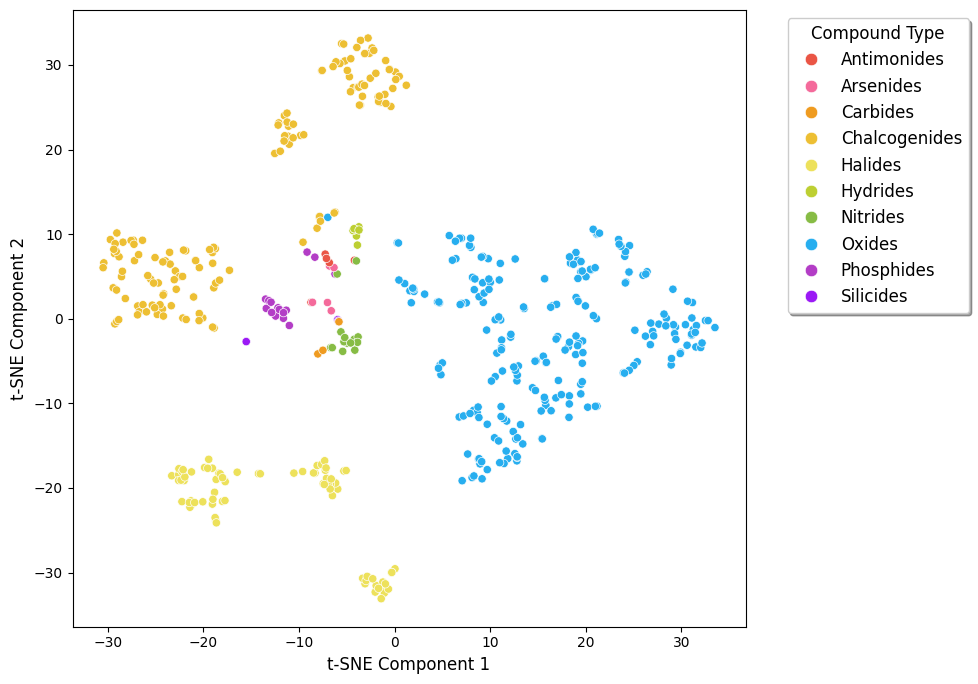

In [47]:
from sklearn.manifold import TSNE

# Convert compound_types to a NumPy array for proper indexing
compound_types_array = np.array(compound_types)  # Ensure it's indexed correctly

# Step 1: Reduce dimensionality with PCA for faster t-SNE
pca = PCA(n_components=10, random_state=42)  # Reduce to 10D
X_pca = pca.fit_transform(X)

# Step 2: Sample a subset of data for faster computation
subset_size = min(500, X_pca.shape[0])  # Use 500 samples max
subset_indices = np.random.choice(X_pca.shape[0], subset_size, replace=False)
X_subset = X_pca[subset_indices]
compound_types_subset = compound_types_array[subset_indices]  # Fixed indexing

# Step 3: Run t-SNE
tsne = TSNE(n_components=2, perplexity=15, n_iter=400, method='barnes_hut', random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Step 5: Plot with fixed colors
plt.figure(figsize=(10, 7))
ax=sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=compound_types_subset,
    palette=fixed_palette,  # Use the predefined color mapping
    legend='full'
)

# Manually fix the order of legend categories
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: unique_compounds.index(x[1]))  # Sort by predefined order
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Improve legend visibility with fixed order
plt.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, markerscale=1.5, frameon=True, shadow=True, title="Compound Type")


plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
# plt.title("t-SNE Visualization of Encoded Features (Fixed Colors)")

plt.tight_layout()
plt.show()

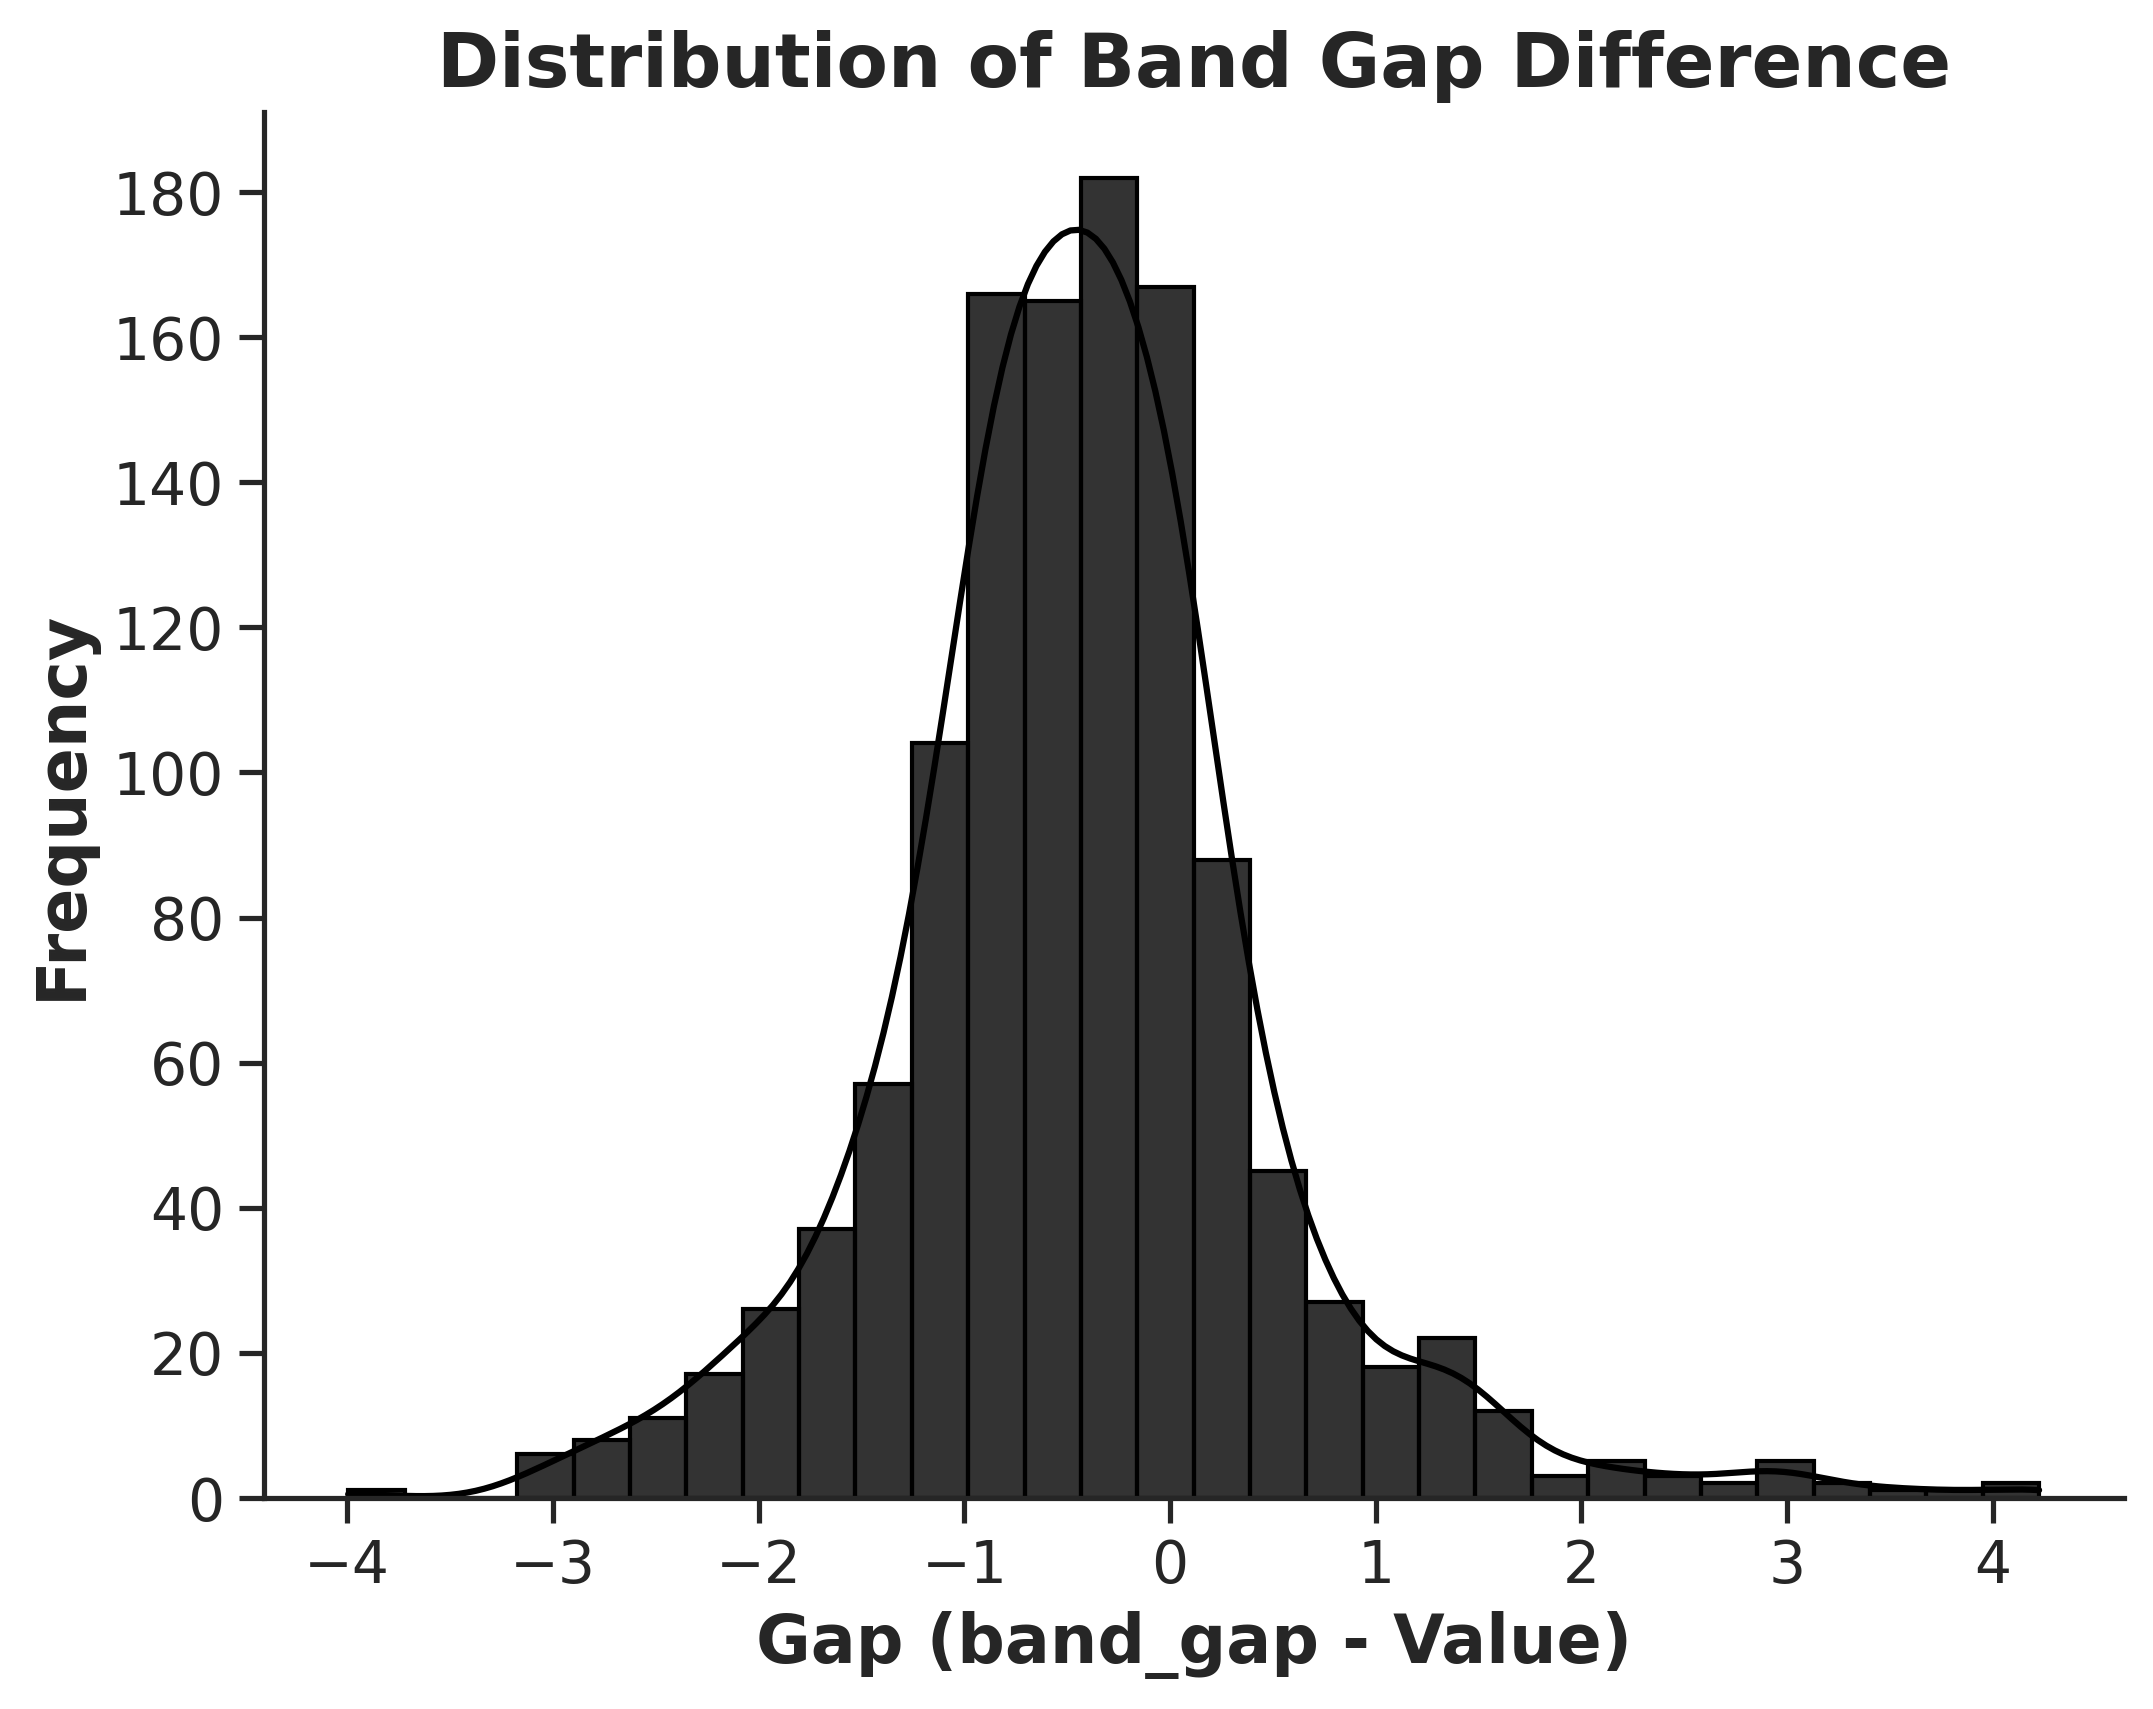

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Compute the gap (difference) between band_gap and Value
data["gap"] = data["band_gap"] - data["Value"]

# Set Nature-style aesthetics
sns.set_theme(style="ticks", font_scale=1.5)  # Clean theme with large font

# Create a high-quality histogram
plt.figure(figsize=(8, 6), dpi=300)  # High DPI for publication quality
sns.histplot(data["gap"], bins=30, kde=True, color="black", edgecolor="black", alpha=0.8)

# Formatting
plt.xlabel("Gap (band_gap - Value)", fontsize=16, fontweight="bold")
plt.ylabel("Frequency", fontsize=16, fontweight="bold")
plt.title("Distribution of Band Gap Difference", fontsize=18, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Adjust tick format
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Save as high-quality image (optional)
# plt.savefig("band_gap_histogram.png", dpi=300, bbox_inches="tight")

plt.show()




In [52]:
unique_data

,formula,mpids,is_stable,theoretical,band_gap,formation_energy_per_atom,Value,DOI,compound_type,Category_count
0,Ag2CO3,mp-560717,False,False,0.7490,-1.063132,2.300,10.1016/j.cej.2019.123192,Oxides,1
1,Ag2Mo2O7,mp-27966,True,False,1.9011,-1.507471,2.685,10.1039/c5ta02337h,Oxides,1
2,Ag2MoO4,mp-19318,False,False,1.8731,-1.251053,3.260,10.1016/j.physb.2019.02.036,Oxides,1
3,Ag2S,mp-556225,False,True,1.0853,-0.118033,1.090,10.1016/j.jece.2017.11.071,Chalcogenides,1
7,Ag2WO4,mp-504466,False,True,2.0439,-1.348470,2.925,10.1016/j.cej.2019.05.060,Oxides,1
...,...,...,...,...,...,...,...,...,...,...
1344,Zr3N4,mp-277,True,False,0.9705,-1.852383,1.600,10.1016/j.tsf.2006.03.020,Nitrides,1
1346,ZrO2,mp-2858,True,False,3.5322,-3.813618,5.000,10.1016/j.cej.2011.10.085,Oxides,1
1347,ZrS2,mp-1186,True,False,1.0418,-1.847667,1.700,10.1016/j.rinp.2018.10.028,Chalcogenides,1
1348,ZrS3,mp-9921,True,False,1.1133,-1.574012,2.070,10.1039/c5cp02813b,Chalcogenides,1


/tmp/ipykernel_78113/3734377816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data["gap"] = unique_data["band_gap"] - unique_data["Value"]
/tmp/ipykernel_78113/3734377816.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=unique_data, x="compound_type", y="Value", palette=fixed_palette, order=sorted_categories)


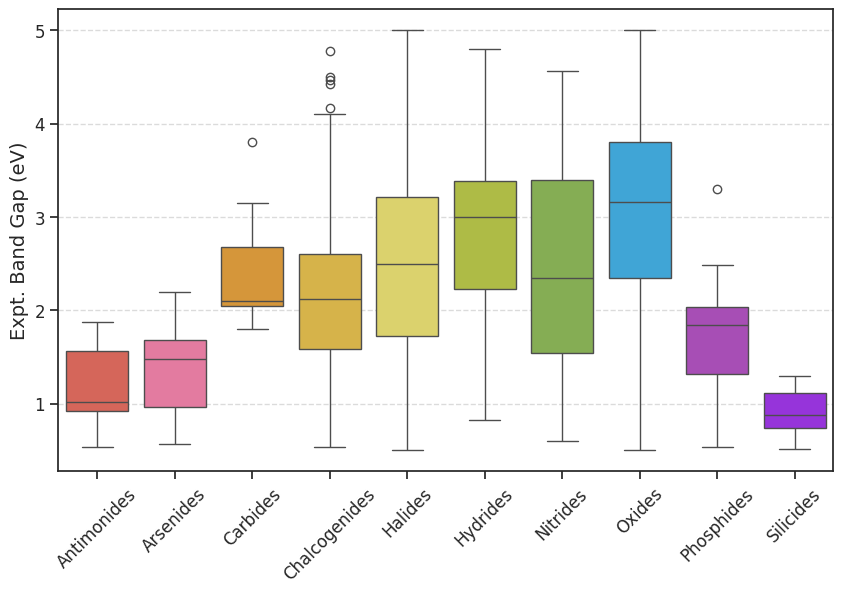

/tmp/ipykernel_78113/3734377816.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=unique_data, x="compound_type", y="gap", palette=fixed_palette, inner="quartile", order=sorted_categories)


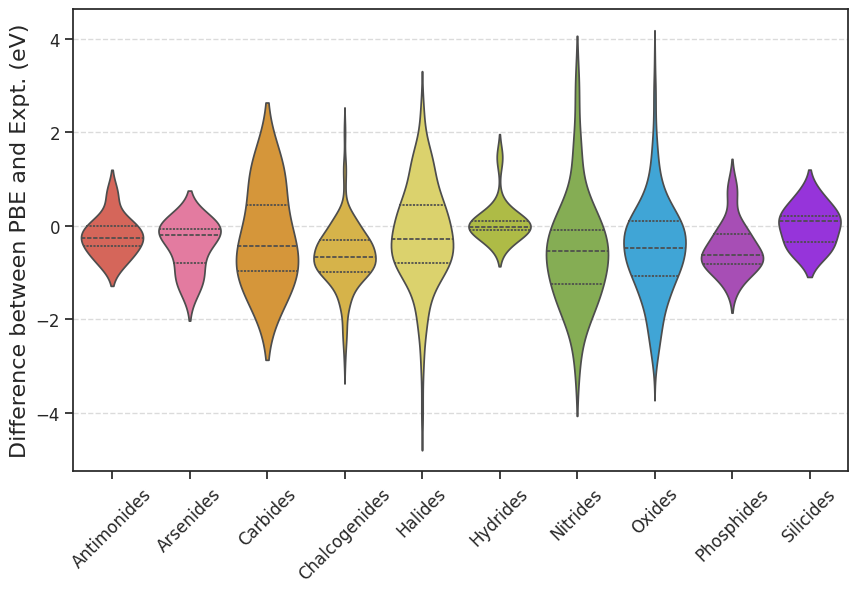

ANOVA Test Results:
F-statistic = 3.510, p-value = 2.769e-04
Significant difference found between compound types (p < 0.05)


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

# Add a color for "Others" at the end of the palette
fixed_palette["Others"] = "#d7e1ee"  # Gray for "Others"

# Compute the gap (difference) between band_gap and Value
unique_data["gap"] = unique_data["band_gap"] - unique_data["Value"]

# Get a sorted list of compound types for alphabetical ordering
sorted_categories = sorted(unique_data["compound_type"].unique())

# Box Plot to compare gap distribution by category (alphabetical order)
plt.figure(figsize=(10, 6))
sns.boxplot(data=unique_data, x="compound_type", y="Value", palette=fixed_palette, order=sorted_categories)
plt.xlabel("")  # Removed x-axis title
plt.ylabel("Expt. Band Gap (eV)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Violin Plot to show density distribution of gap per category (alphabetical order)
plt.figure(figsize=(10, 6))
sns.violinplot(data=unique_data, x="compound_type", y="gap", palette=fixed_palette, inner="quartile", order=sorted_categories)
plt.xlabel("")  # Removed x-axis title
plt.ylabel("Difference between PBE and Expt. (eV)", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ANOVA Test (One-Way ANOVA) to check statistical significance
# Extract gap values for each compound type
grouped_data = [group["gap"].dropna().values for _, group in unique_data.groupby("compound_type")]

# Perform ANOVA test
anova_result = f_oneway(*grouped_data)

# Print ANOVA result
print(f"ANOVA Test Results:\nF-statistic = {anova_result.statistic:.3f}, p-value = {anova_result.pvalue:.3e}")

# Interpretation of ANOVA results
if anova_result.pvalue < 0.05:
    print("Significant difference found between compound types (p < 0.05)")
else:
    print("No significant difference found between compound types (p >= 0.05)")


In [50]:
data

,formula,mpids,is_stable,theoretical,band_gap,formation_energy_per_atom,Value,DOI,compound_type,Category_count,gap
0,Ag2CO3,mp-560717,False,False,0.7490,-1.063132,2.300,10.1016/j.cej.2019.123192,Oxides,1,-1.5510
1,Ag2Mo2O7,mp-27966,True,False,1.9011,-1.507471,2.685,10.1039/c5ta02337h,Oxides,1,-0.7839
2,Ag2MoO4,mp-19318,False,False,1.8731,-1.251053,3.260,10.1016/j.physb.2019.02.036,Oxides,1,-1.3869
3,Ag2S,mp-556225,False,True,1.0853,-0.118033,1.090,10.1016/j.jece.2017.11.071,Chalcogenides,1,-0.0047
4,Ag2S2O7,mp-1192057,True,False,2.3016,-1.405367,2.240,10.1039/c3nr06565k,Chalcogenides,2,0.0616
...,...,...,...,...,...,...,...,...,...,...,...
1346,ZrO2,mp-2858,True,False,3.5322,-3.813618,5.000,10.1016/j.cej.2011.10.085,Oxides,1,-1.4678
1347,ZrS2,mp-1186,True,False,1.0418,-1.847667,1.700,10.1016/j.rinp.2018.10.028,Chalcogenides,1,-0.6582
1348,ZrS3,mp-9921,True,False,1.1133,-1.574012,2.070,10.1039/c5cp02813b,Chalcogenides,1,-0.9567
1349,ZrSiO4,mp-4820,True,False,4.1495,-3.558760,4.000,10.1039/c8pp00315g,Silicides,2,0.1495
